# Hoja de Trabajo 4

### Marlon Tzorin - 20180072

In [51]:
import warnings
warnings.filterwarnings(action='ignore')

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### 1. Leer el archivo CSV proporcionado (kc_house_data.csv) y almacenarlo en un np.array para ser trabajado en el notebook.

In [81]:
df = pd.read_csv('kc_house_data.csv')

### Ajustar un modelo polinómico (regresión lineal) en base al juego de datos cargado de forma matricial que relacione las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price – sqft_living). 

In [152]:
df['sqft_living2'] = df['sqft_living'] ** 2
df['sqft_living3'] = df['sqft_living'] ** 3
df['sqft_living4'] = df['sqft_living'] ** 4
df['sqft_living5'] = df['sqft_living'] ** 5
df['sqft_living6'] = df['sqft_living'] ** 6
df['sqft_living7'] = df['sqft_living'] ** 7

In [153]:
df['cons'] = 1
y = df[['price']].to_numpy()
X = df[['cons','sqft_living','sqft_living2']].to_numpy()

### 2.Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase). 

In [154]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

In [155]:
def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [156]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.0001, threshold=0.001, max_iter=10000): 
    
    theta = theta_0
    iteration = 0 
    costs = []
    thetas = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,theta)) > threshold and iteration < max_iter:
        iteration += 1 
        theta = theta - (learning_rate * linear_cost_gradient(X,y,theta))
        costs.append(linear_cost(X,y,theta))
        thetas.append(theta.copy())
        
    return theta, costs, thetas

### 3.Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).  

In [215]:
m, n = X.shape
theta_0 = np.random.rand(n,1)

In [158]:
np.random.shuffle(X)
np.random.shuffle(y)

In [159]:
X_train = X[:12968]
X_cv = X[12968:17290]
X_test = X[17290:21613]
y_train = y[:12968]
y_cv = y[12968:17290]
y_test = y[17290:21613]

## Polinomio Grado 2

In [160]:
theta, costs, thetas = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient,0.00000000000001,0.001,50)

In [216]:
print(costs[len(costs)-1])

141896467283.5598


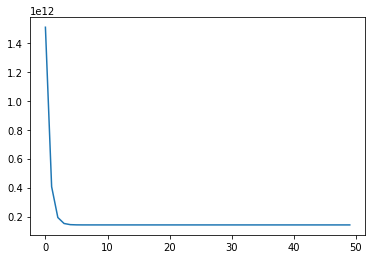

In [161]:
plt.plot(costs)

## Polinomio Grado 3

In [163]:
y2 = df[['price']].to_numpy()
X2 = df[['cons','sqft_living','sqft_living2','sqft_living3']].to_numpy()
np.random.shuffle(X2)
np.random.shuffle(y2)

In [164]:
X2_train = X2[:12968]
X2_cv = X2[12968:17290]
X2_test = X2[17290:21613]
y2_train = y2[:12968]
y2_cv = y2[12968:17290]
y2_test = y2[17290:21613]
m, n = X2.shape
theta_02 = np.random.rand(n,1)

In [165]:
theta2, costs2, thetas2 = gradient_descent(X2_train,y2_train,theta_02,linear_cost,linear_cost_gradient,0.00000000000000000000001,0.001,10000)

In [166]:
print(costs2[len(costs2)-1])

126073509494.91626


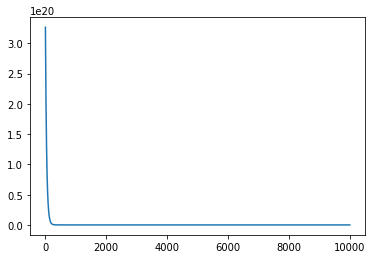

In [167]:
plt.plot(costs2)

## Polinomio Grado 5


In [195]:
y3 = df[['price']].to_numpy()
X3 = df[['cons','sqft_living','sqft_living2','sqft_living3','sqft_living4','sqft_living5']].to_numpy()
np.random.shuffle(X3)
np.random.shuffle(y3)

In [196]:
X3_train = X3[:12968]
X3_cv = X3[12968:17290]
X3_test = X3[17290:21613]
y3_train = y3[:12968]
y3_cv = y3[12968:17290]
y3_test = y3[17290:21613]
m, n = X3.shape
theta_03 = np.random.rand(n,1)

In [204]:
theta3, costs3, thetas3 = gradient_descent(X3_train,y3_train,theta_03,linear_cost,linear_cost_gradient,0.00000000000000000000000000000000000000001,0.01,1000)

In [205]:
print(costs3[len(costs3)-1])

1.0559031673205055e+35


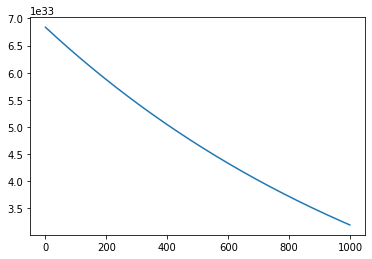

In [172]:
plt.plot(costs3)

## Polinomio Grado 7

In [173]:
y4 = df[['price']].to_numpy()
X4 = df[['cons','sqft_living','sqft_living2','sqft_living3','sqft_living4','sqft_living5','sqft_living6','sqft_living7']].to_numpy()
np.random.shuffle(X4)
np.random.shuffle(y4)

In [176]:
X4_train = X4[:12968]
X4_cv = X4[12968:17290]
X4_test = X4[17290:21613]
y4_train = y4[:12968]
y4_cv = y4[12968:17290]
y4_test = y4[17290:21613]
m, n = X4.shape
theta_04 = np.random.rand(n,1)

In [212]:
theta4, costs4, thetas4 = gradient_descent(X4_train,y4_train,theta_04,linear_cost,linear_cost_gradient,0.00000000000000000000000000000000000000001,0.01,1000)

In [213]:
print(costs4[len(costs4)-1])

2.4188406867142917e+36


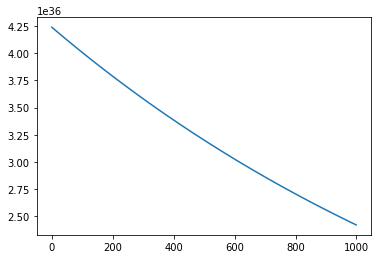

In [214]:
plt.plot(costs4)

## Analisis

#### Despues de probar con diferentes polinomios el que me tira mejores resultados es el polinomio de grado 5 , ya que los polinomios anteriores no reducen lo suficiente el costo y el siguiente polinomio empieza a subir otra vez debido al error. Por lo cual para estos datos lo mejores seria el polinomio de grado 5